In [1]:
from environments.PlantSimulator import PlantSimulator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = PlantSimulator(actions=[0, 1], action_effects=[1.0, 0.0])

#### Test random lighting policies

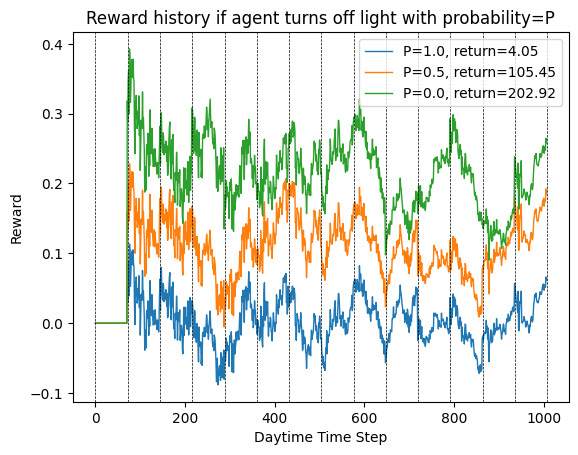

In [3]:
for off_prob in [1, 0.5, 0]:
    env.start()
    R = []
    S = []
    A = []
    for _ in range(env.terminal_step):
        reward, next_state, done, info = env.step(np.random.choice([0, 1], p=[off_prob, 1-off_prob]))
        A.append(env.actual_area(env.time)/env.observation[0])
        R.append(reward)
        S.append(env.observation[-1]/env.observation[0])
    plt.plot(R, label=f'P={off_prob:.1f}, return={np.sum(R):.2f}', linewidth=1)

for i in range(int(len(R)/env.steps_per_day)+2):
    plt.axvline(x = env.steps_per_day*i, color='k', linestyle='--', linewidth=0.5)
plt.title(f'Reward history if agent turns off light with probability=P')
plt.xlabel('Daytime Time Step')
plt.ylabel('Reward')
plt.legend()

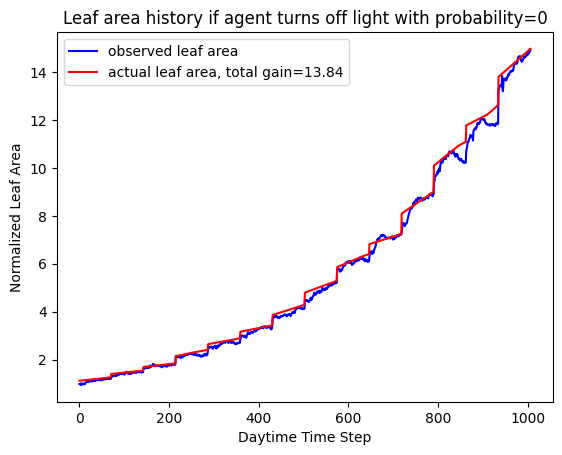

In [4]:
# Plot the area history
plt.plot(S, 'b', label='observed leaf area')
plt.plot(A, 'r', label=f'actual leaf area, total gain={A[-1]-A[0]:.2f}')
plt.title(f'Leaf area history if agent turns off light with probability={off_prob}')
plt.xlabel('Daytime Time Step')
plt.ylabel('Normalized Leaf Area')
plt.legend()

#### Correlation between area gain and return

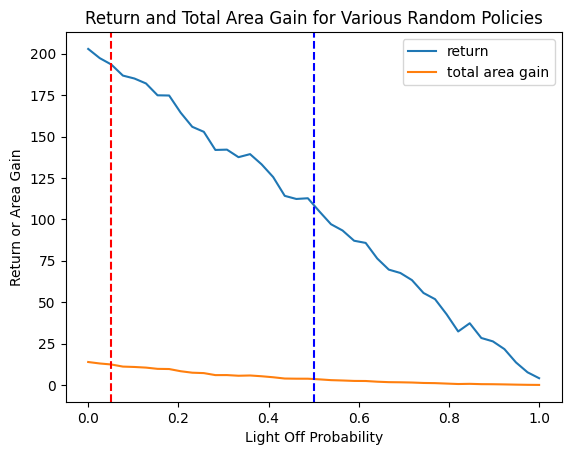

In [5]:
# See if return and total gain in area are positively correlated
num_sample = 40
episodic_return = []
area_gain = []
for prob in np.linspace(0, 1, num_sample):
    env.start()
    R = []; A = []
    for _ in range(env.terminal_step):
        reward, next_state, done, info = env.step(np.random.choice([0, 1], p = [prob, 1-prob]))
        A.append(env.actual_area(env.time)/env.observation[0])
        R.append(reward)
    episodic_return.append(np.sum(R))
    area_gain.append(A[-1]-A[0])

plt.plot(np.linspace(0, 1, num_sample), episodic_return, label=f'return')
plt.plot(np.linspace(0, 1, num_sample), area_gain, label=f'total area gain')
plt.axvline(x = 0.1/2, color='red', linestyle='--')
plt.axvline(x = 0.5, color='blue', linestyle='--')
plt.title(f'Return and Total Area Gain for Various Random Policies')
plt.xlabel('Light Off Probability')
plt.ylabel('Return or Area Gain')
plt.legend()